# **sleeptime_prediction 😴😴 Data Analysis & Forecasting & ML**


## ***📈 Introduction***

**In today’s fast-paced world, understanding the balance between productivity and well-being is more important than ever. With the increasing demands of work, study, and personal commitments, it is crucial to analyze how individuals allocate their time across various activities and its impact on their overall health and productivity. This analysis aims to explore the relationships between daily activities, caffeine intake, and sleep patterns to gain insights into effective time management and lifestyle choices.**

## 🎯 Goals of the Notebook

1. **Understand Time Allocation**: Analyze how time is spent across different activities such as workouts, reading, and leisure, and how these impact overall well-being.
2. **Evaluate Caffeine Intake**: Examine the relationship between caffeine consumption and its effect on sleep quality and daily productivity..
3. **Exploratory Data Analysis (EDA)**: Visualize relationships and patterns within the data.
4. **Statistical Analysis**: Analyze the impact of different features on property prices.
5. **ML model**: Machine learning modelto predict the price based on the analysis.

## ***📊 Dataset Overview***
**This dataset contains information about Crime Prediction , including:**

*  **WorkoutTime**: The amount of time spent on physical exercise (in hours).
* **ReadingTime**: The duration dedicated to reading activities (in hours).
* **PhoneTime**: The time spent using a phone or other electronic devices (in hours).
* **WorkHours**: The total hours worked during a given day (in hours).
* **CaffeineIntake**: The amount of caffeine consumed (in milligrams).
* **RelaxationTime**: The time spent on relaxation activities, such as meditation or leisure (in hours).
* **SleepTime**: The total duration of sleep during the night (in hours).

# ***Section 1: Importing Necessary Libraries***

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score


# ***Section 2: Reading Datasets and Initial Exploration***

##  **1.Loading the Dataset**





In [301]:
df = pd.read_csv('/content/sleeptime_prediction_dataset.csv')

## **2. Displaying Basic Information About the Dataset**

In [302]:
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [304]:
df.shape

(2000, 7)

## **3.Descriptive Statistics**

In [305]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


## **4-Checking for Missing & Duplicated Values**

In [306]:
df.isnull().sum()

,0
WorkoutTime,0
ReadingTime,0
PhoneTime,0
WorkHours,0
CaffeineIntake,0
RelaxationTime,0
SleepTime,0


<Axes: >

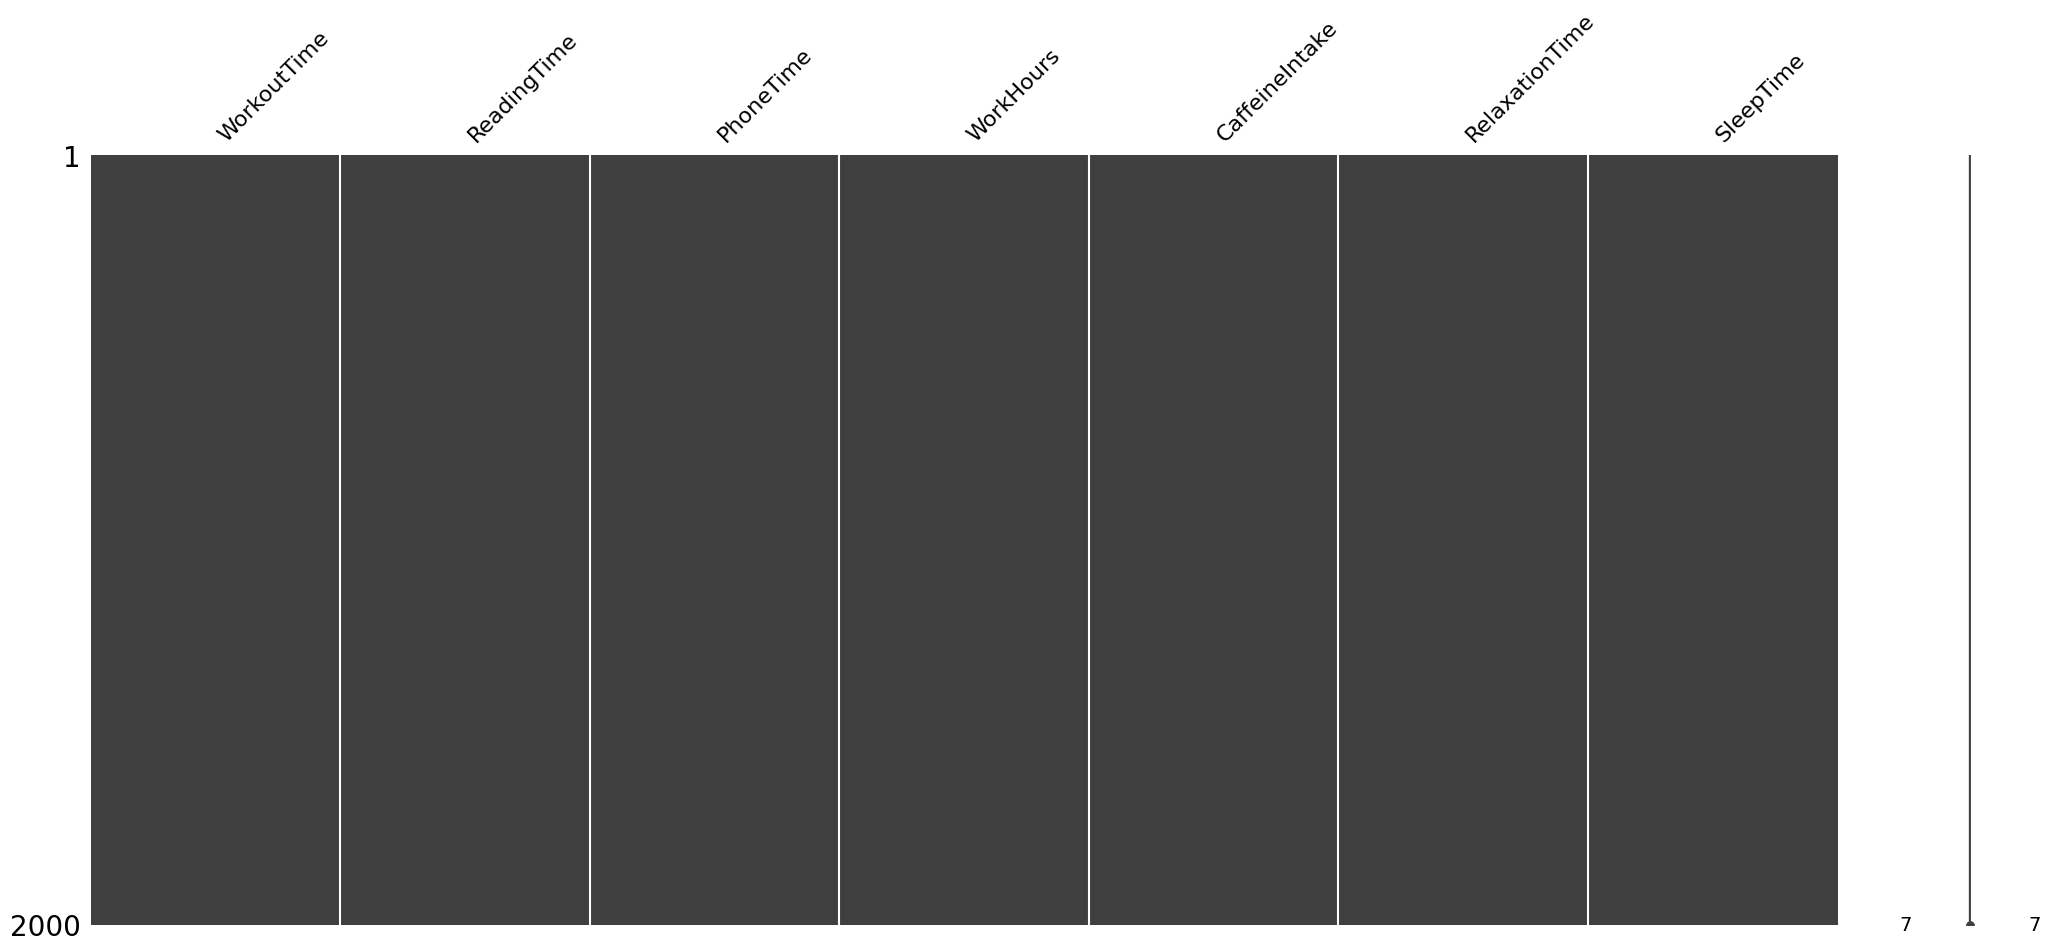

In [307]:
msno.matrix(df)

In [308]:
df.duplicated().sum()

0

## **5. Corr Matrix**

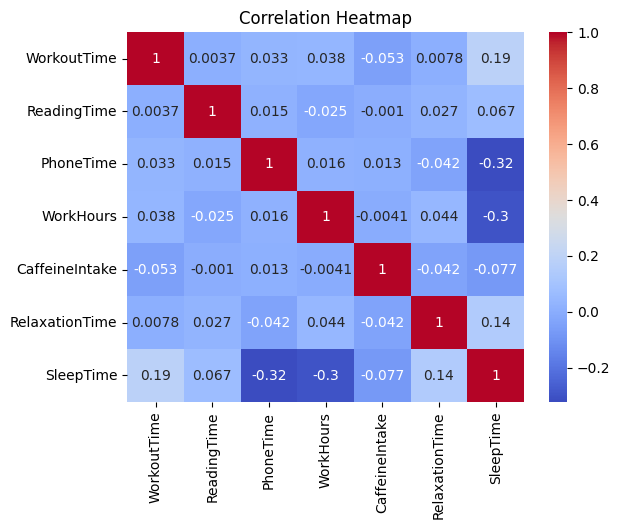

In [309]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

# ***Section 3: Data Cleaning and Preprocessing***

###  **1. Missing or Duplicated Data**

In [310]:
# No missing or Duplicated values

### **2.  Feature Engineering**





**1. Total Daily Activity Time : all time spent on various activities**

**2. Sleep Deficit : he difference between recommended sleep (8 hours) and actual sleep time .**


In [311]:
df['Total Activity Time'] = df['WorkoutTime'] + df['ReadingTime'] + df['PhoneTime'] + df['WorkHours'] + df['RelaxationTime']

In [312]:
RECOMMENDED_SLEEP = 8
df['Sleep Deficit'] = RECOMMENDED_SLEEP - df['SleepTime']

In [313]:
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,Total Activity Time,Sleep Deficit
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45,13.57,4.55
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88,13.26,3.12
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61,17.63,4.39
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94,12.81,3.06
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50,8.50,2.50


# ***Section 4: Exploratory Data Analysis (EDA)***

## **1.  Basic EDA**

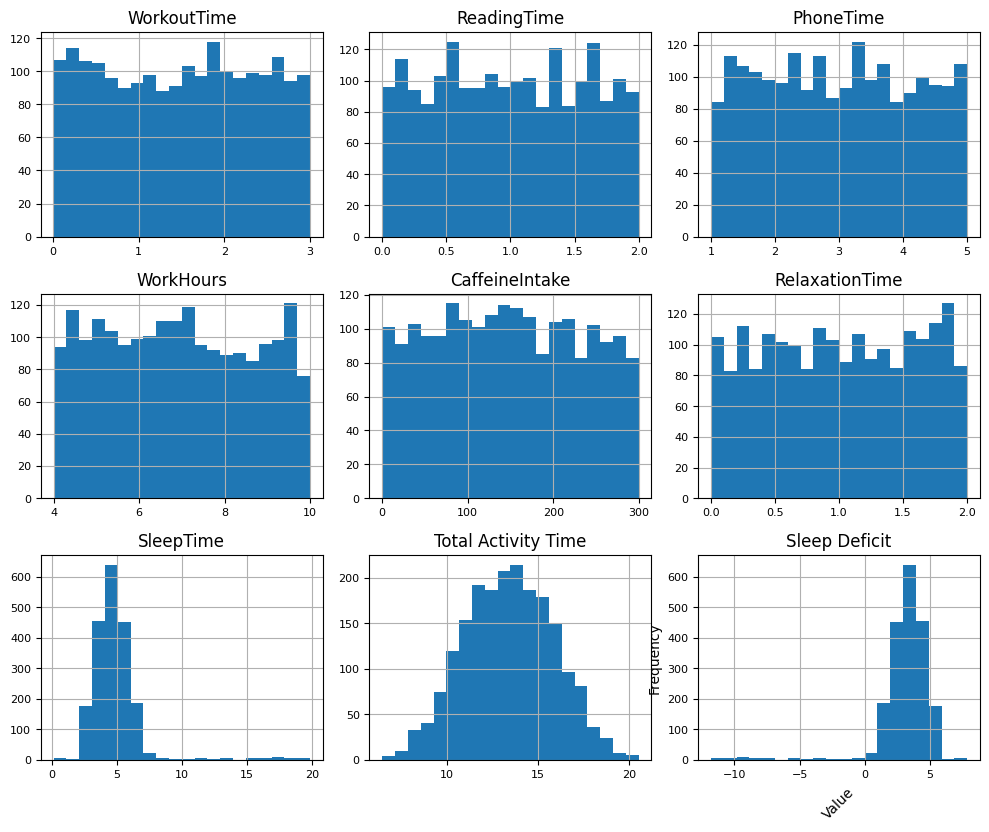

In [314]:
df.hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

## **2.  Medium EDA(Exploring Relationships and Patterns)**

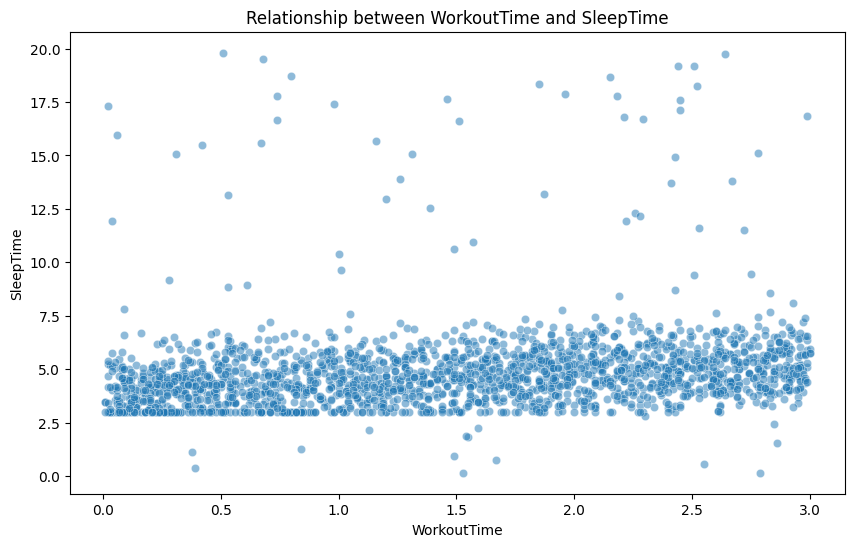

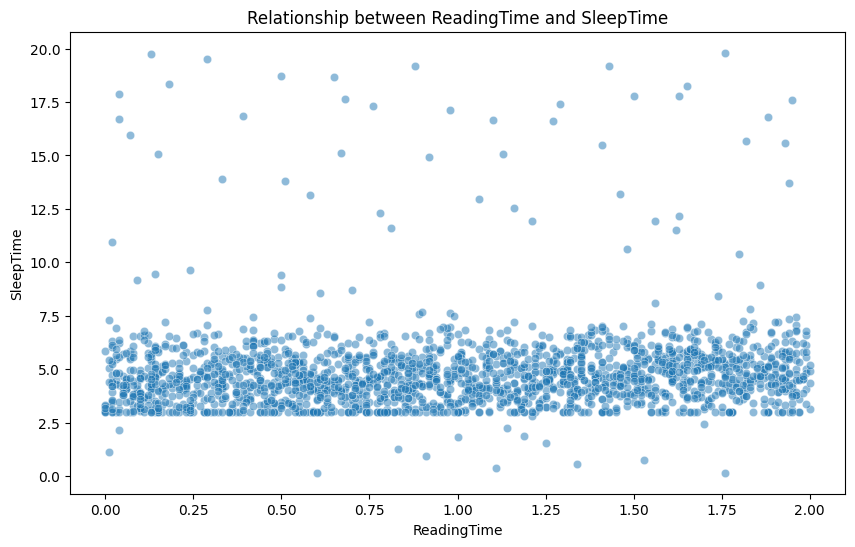

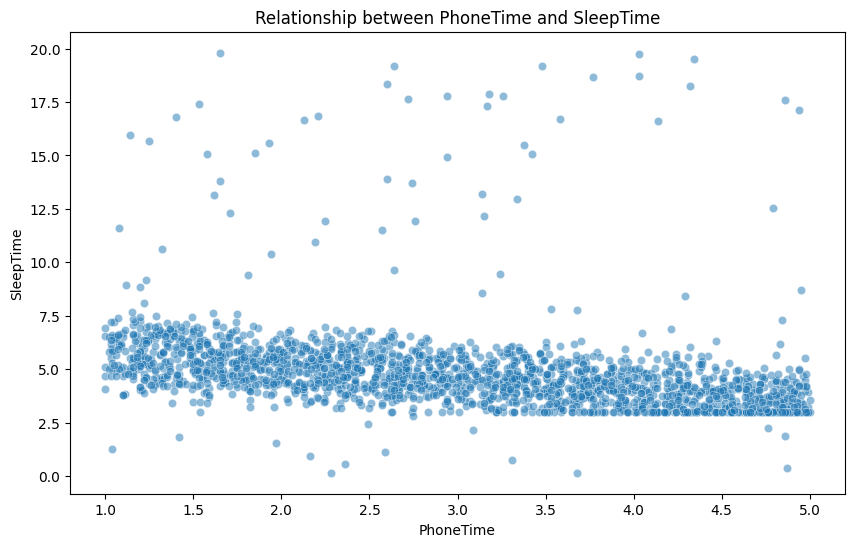

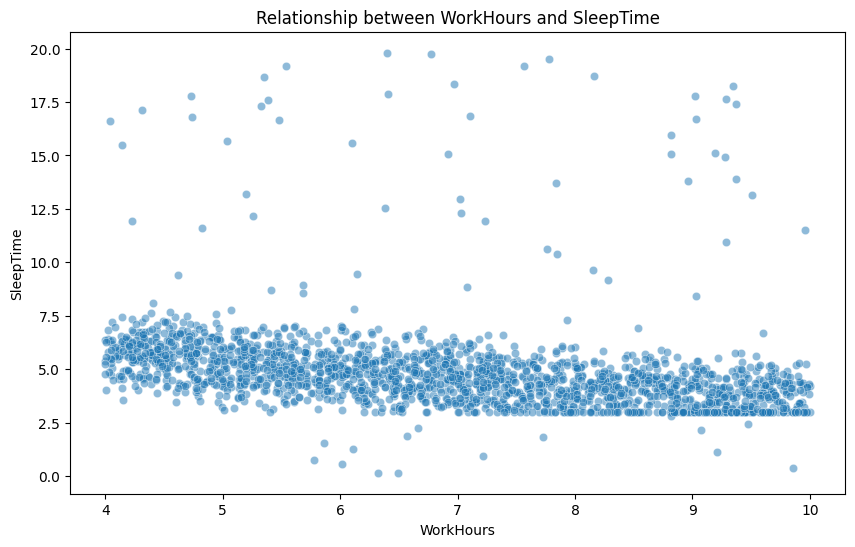

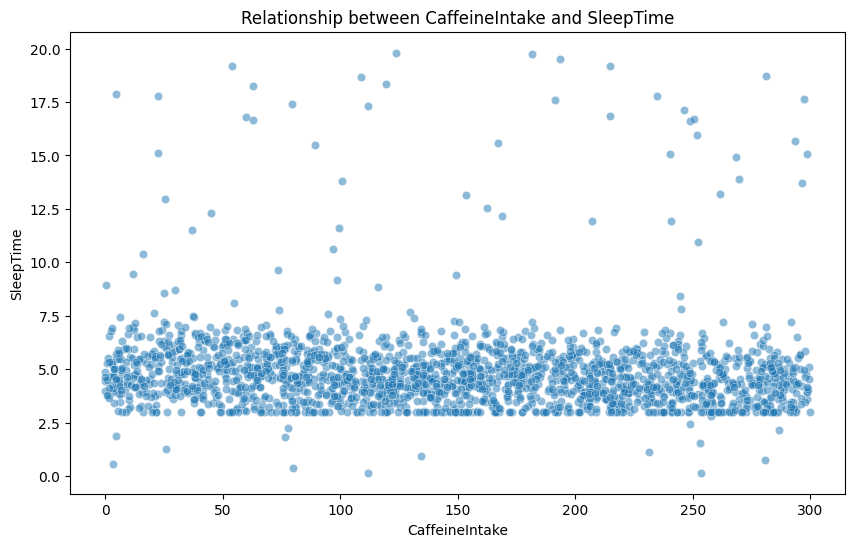

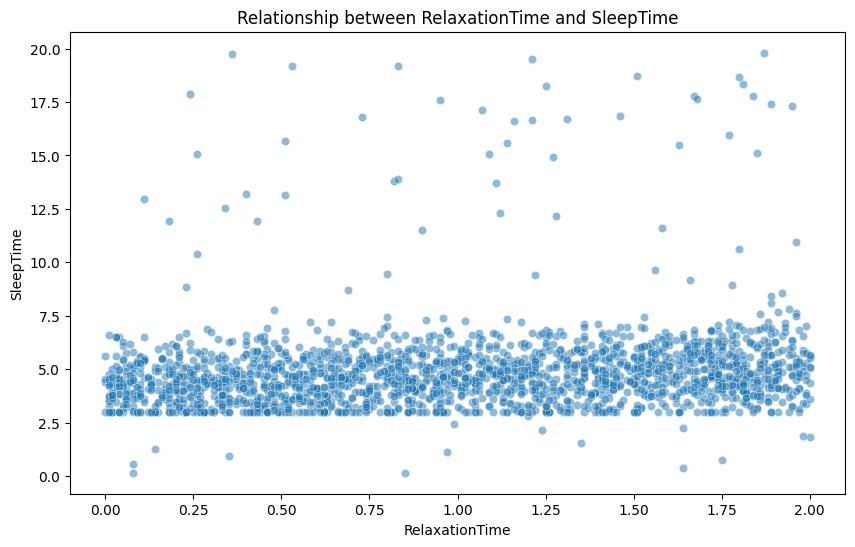

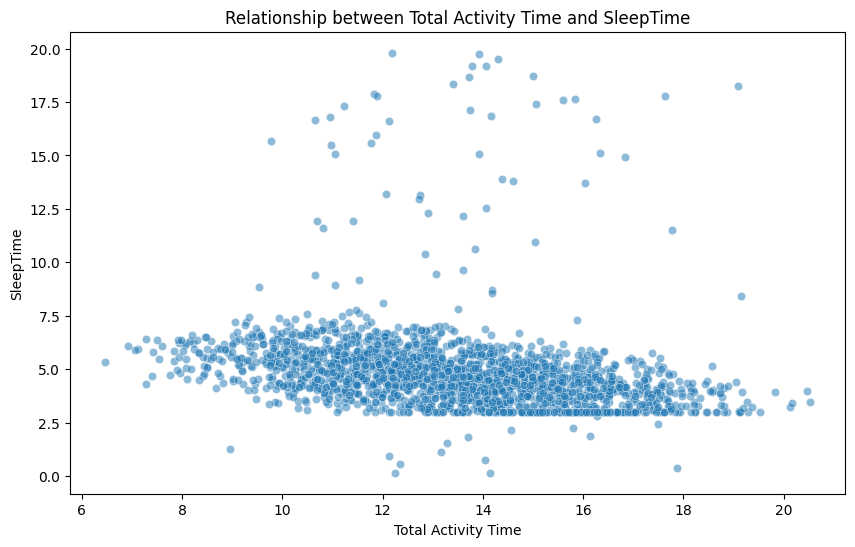

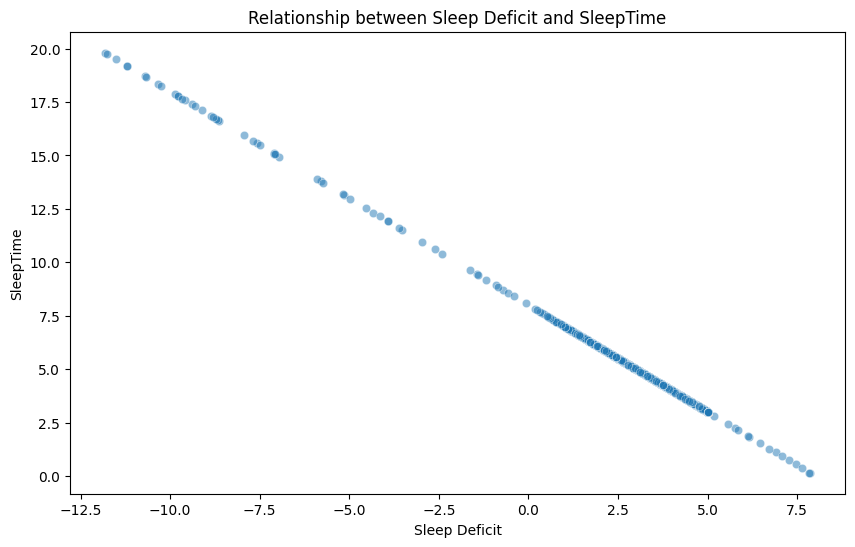

In [321]:
for col in df :
  if col not in ['SleepTime']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='SleepTime', alpha=0.5)
    plt.title(f'Relationship between {col} and SleepTime')
    plt.xlabel(col)
    plt.ylabel('SleepTime')
    plt.show()

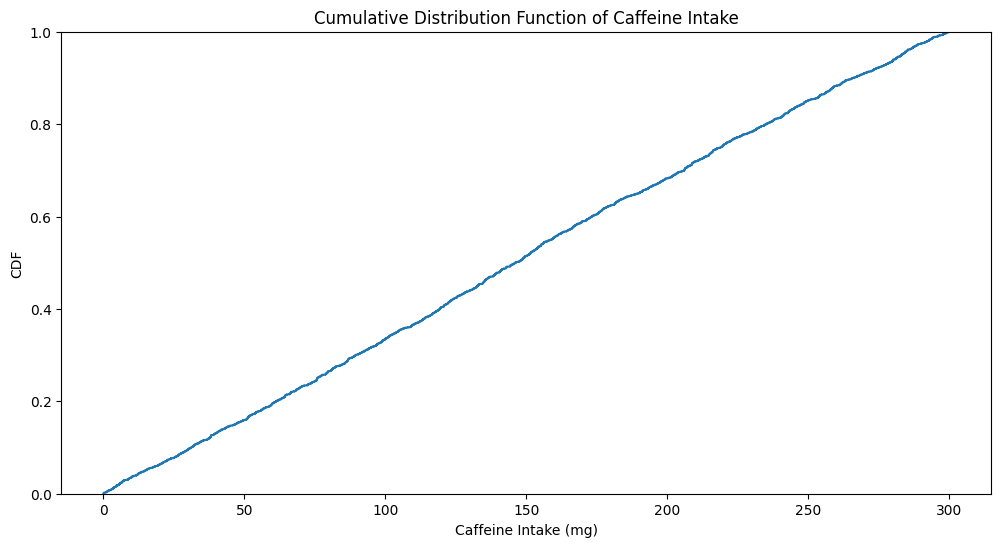

In [322]:
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['CaffeineIntake'])
plt.title('Cumulative Distribution Function of Caffeine Intake')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('CDF')
plt.show()

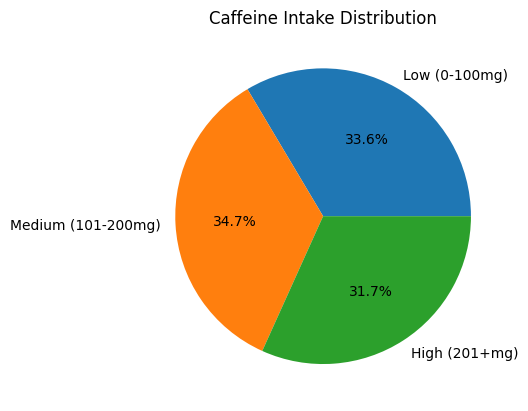

In [323]:
caffeine_categories = ['Low (0-100mg)', 'Medium (101-200mg)', 'High (201+mg)']
caffeine_counts = [len(df[df['CaffeineIntake'] <= 100]), len(df[(df['CaffeineIntake'] > 100) & (df['CaffeineIntake'] <= 200)]), len(df[(df['CaffeineIntake'] > 200)])]

plt.pie(caffeine_counts, labels=caffeine_categories, autopct='%1.1f%%')
plt.title('Caffeine Intake Distribution')
plt.show()


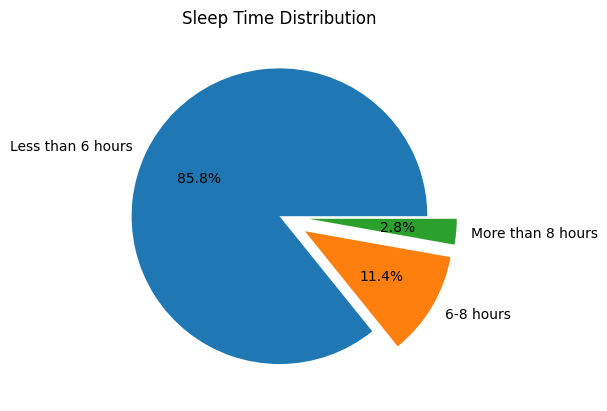

In [324]:
sleep_time_categories = ['Less than 6 hours', '6-8 hours', 'More than 8 hours']
sleep_time_counts = [len(df[(df['SleepTime'] < 6)]), len(df[(df['SleepTime'] >= 6) & (df['SleepTime'] <= 8)]), len(df[(df['SleepTime'] > 8)])]
plt.pie(sleep_time_counts, labels=sleep_time_categories, autopct='%1.1f%%', explode=(0,.2,.2))
plt.title('Sleep Time Distribution')
plt.show()

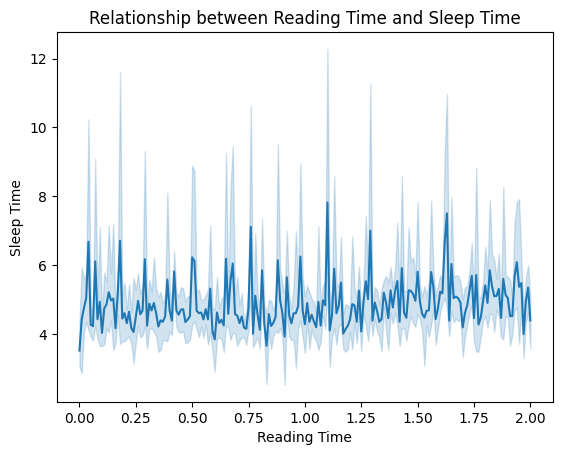

In [325]:
sns.lineplot(data=df, x='ReadingTime', y='SleepTime', palette='viridis')
plt.title('Relationship between Reading Time and Sleep Time')
plt.xlabel('Reading Time')
plt.ylabel('Sleep Time')
plt.show()

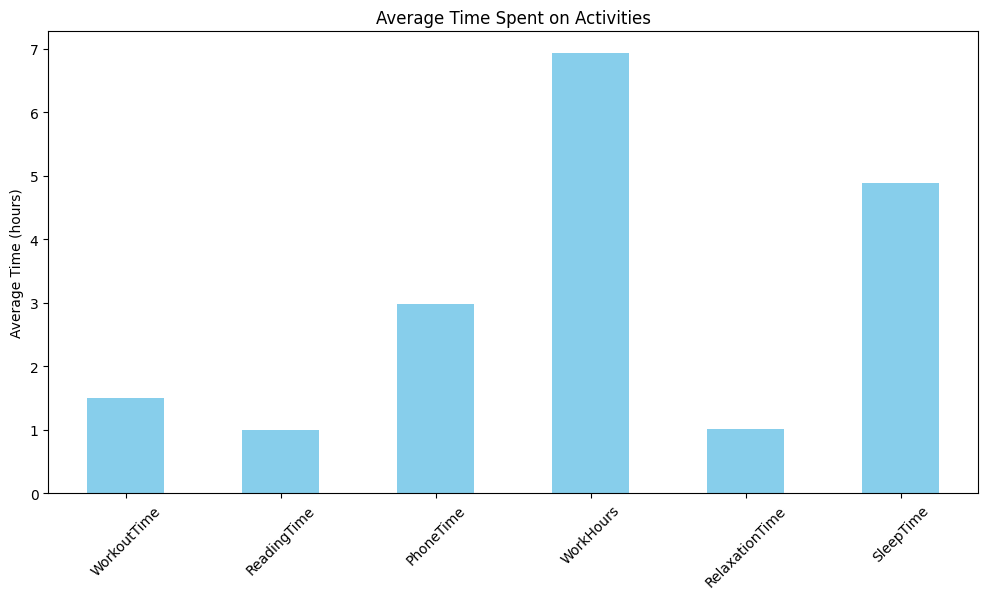

In [326]:
activity_means = df[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'RelaxationTime', 'SleepTime']].mean()
activity_means.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Time Spent on Activities')
plt.ylabel('Average Time (hours)')
plt.xticks(rotation=45)
plt.show()

## **3.  Advanced EDA(Deeper Insights)**

### **3.1 Cumulative Trends Analysis**

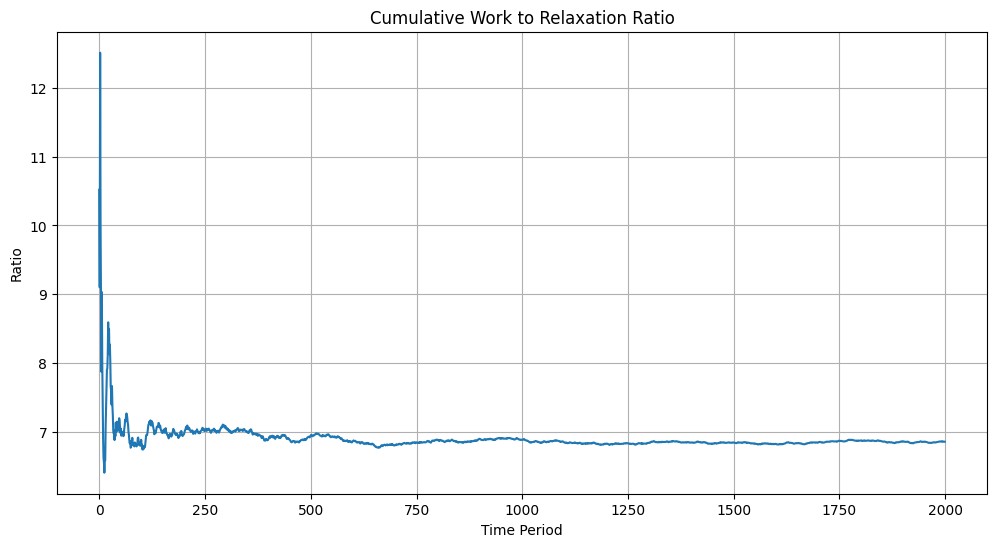

In [327]:
cumulative_reading = df['ReadingTime'].cumsum()

df['Work_Relax_Ratio'] = (df['WorkHours'].cumsum() /
                           df['RelaxationTime'].cumsum())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Work_Relax_Ratio'])
plt.title('Cumulative Work to Relaxation Ratio')
plt.xlabel('Time Period')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

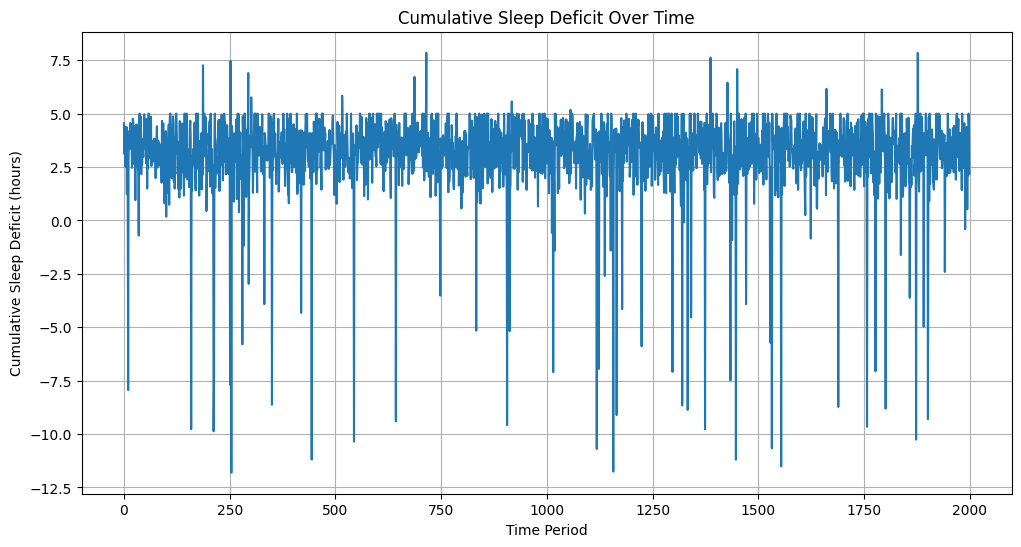

In [328]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sleep Deficit'])
plt.title('Cumulative Sleep Deficit Over Time')
plt.xlabel('Time Period')
plt.ylabel('Cumulative Sleep Deficit (hours)')
plt.grid(True)
plt.show()

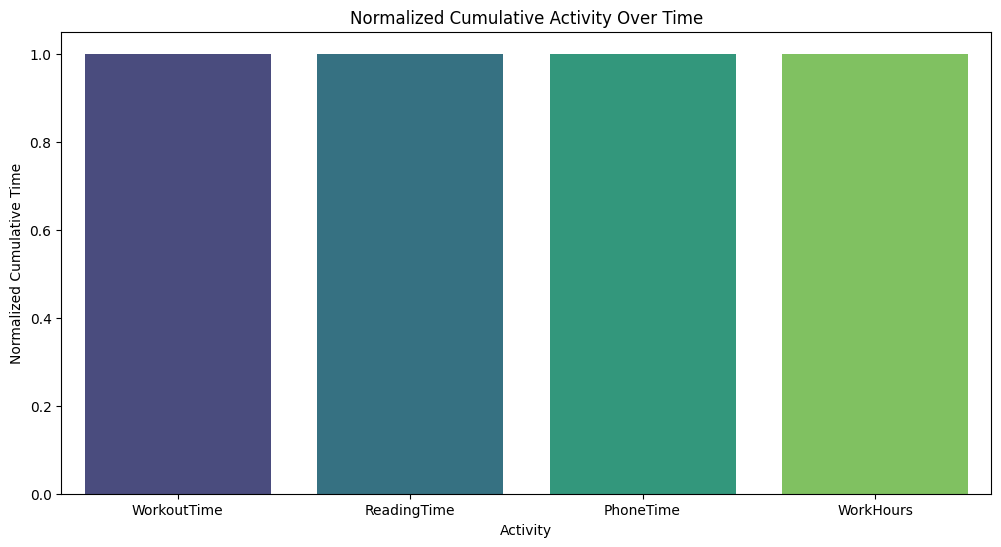

In [329]:
normalized_activities = df[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours']].cumsum()
normalized_activities = normalized_activities.div(normalized_activities.max())

plt.figure(figsize=(12, 6))
sns.barplot(x=normalized_activities.columns, y=normalized_activities.iloc[-1], palette='viridis')
plt.title('Normalized Cumulative Activity Over Time')
plt.xlabel('Activity')
plt.ylabel('Normalized Cumulative Time')
plt.show()

### **3.2 Handling outliers**

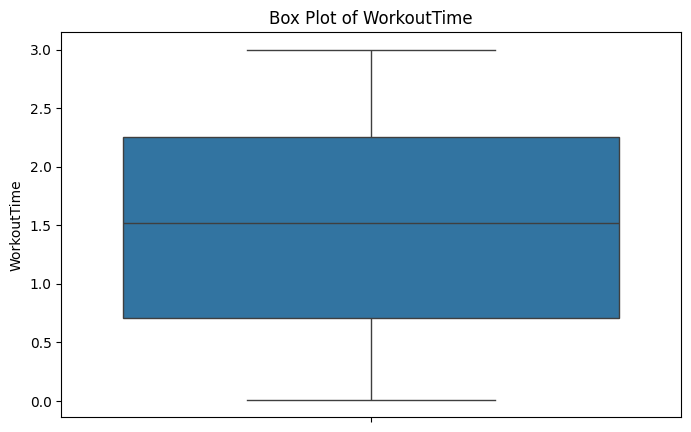

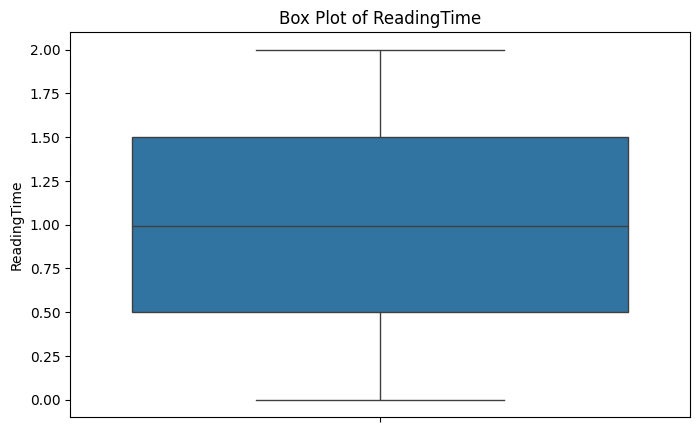

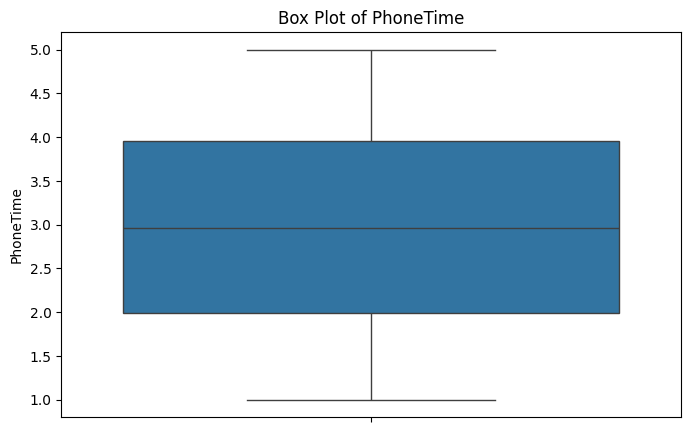

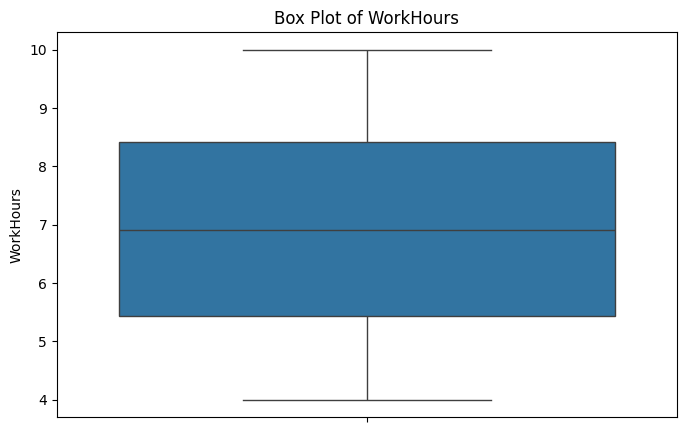

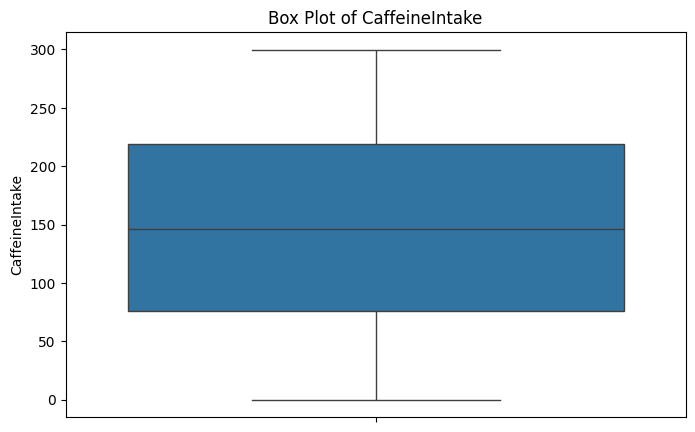

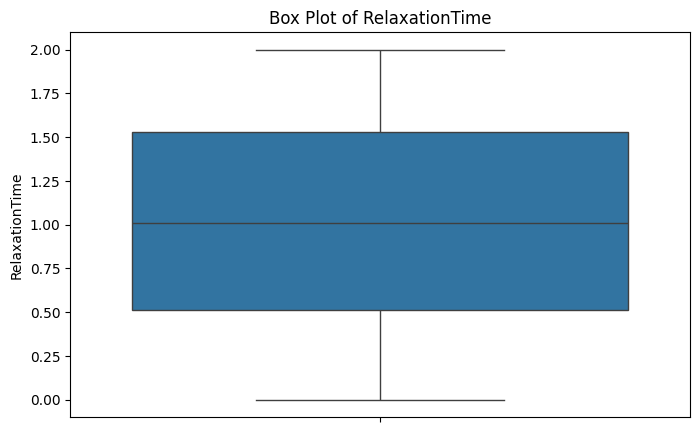

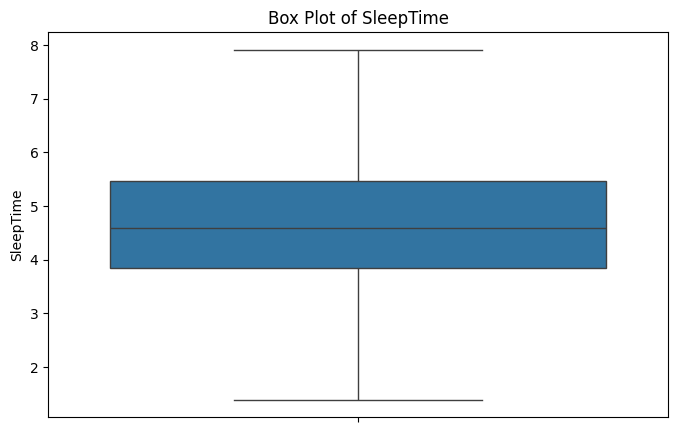

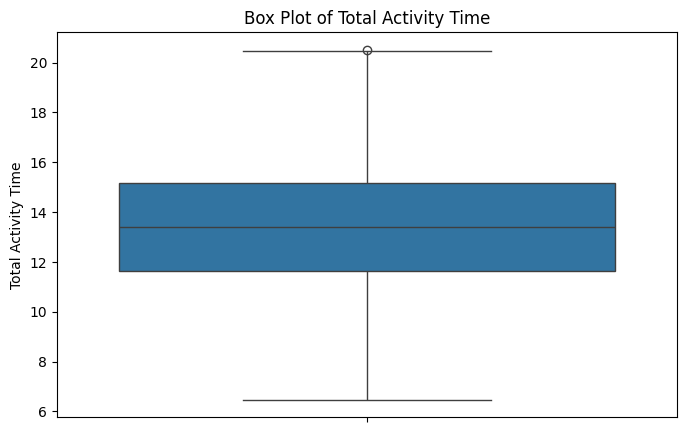

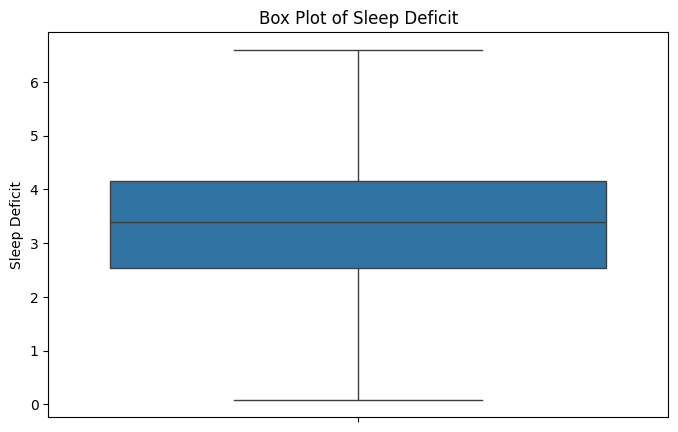

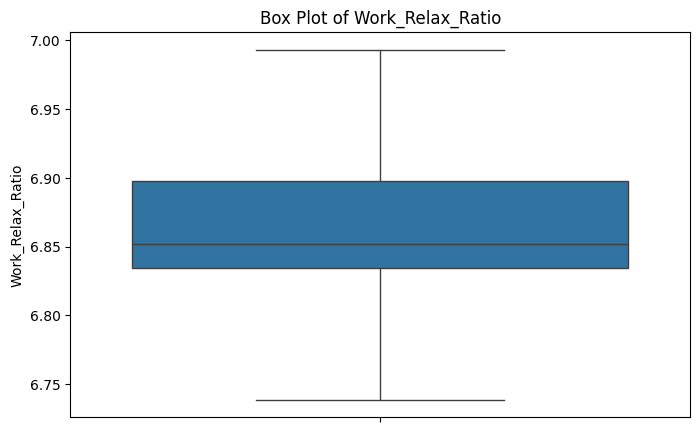

In [335]:
for col in df:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [336]:
df.columns

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime', 'Total Activity Time',
       'Sleep Deficit', 'Work_Relax_Ratio'],
      dtype='object')

In [337]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower = lower_bound, upper = upper_bound)


In [338]:
handle_outliers(df,'Sleep Deficit')
handle_outliers(df,'Work_Relax_Ratio')
handle_outliers(df,'SleepTime')





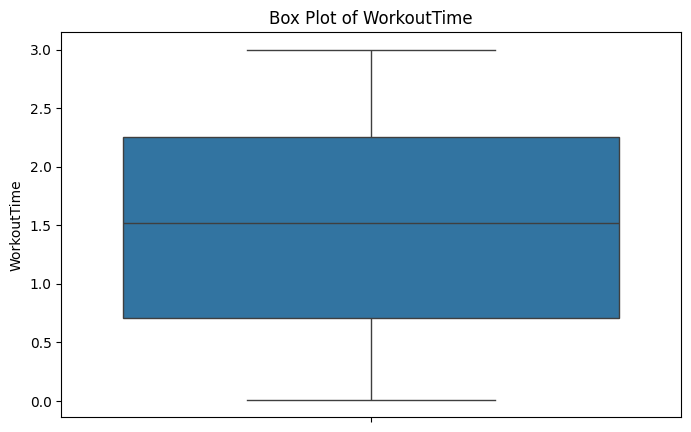

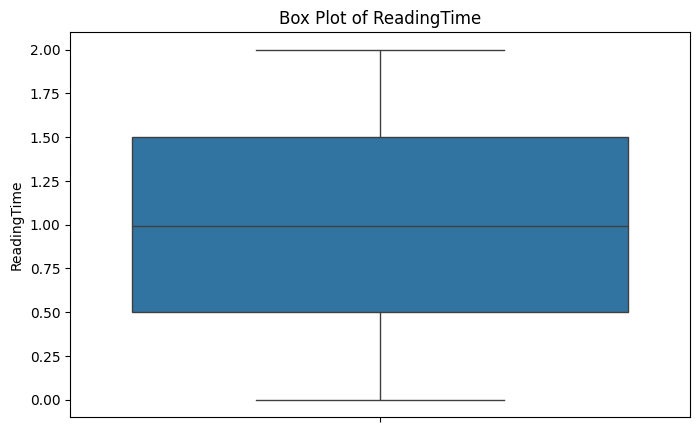

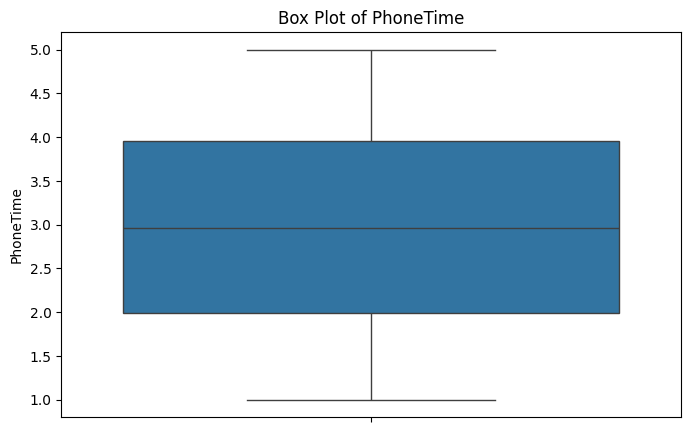

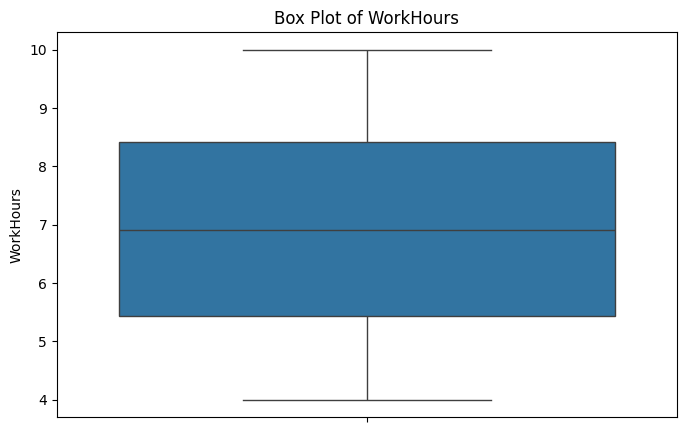

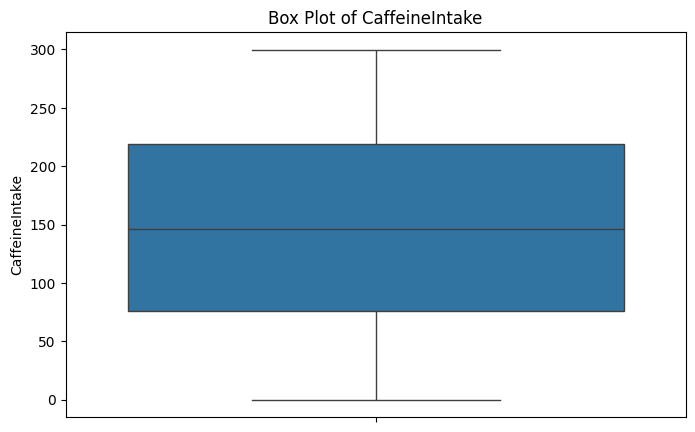

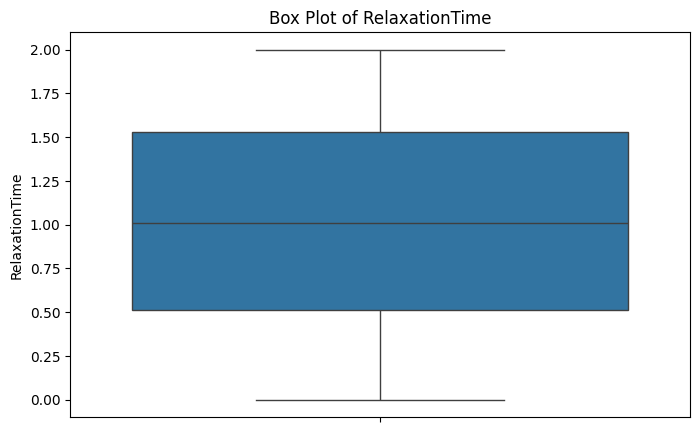

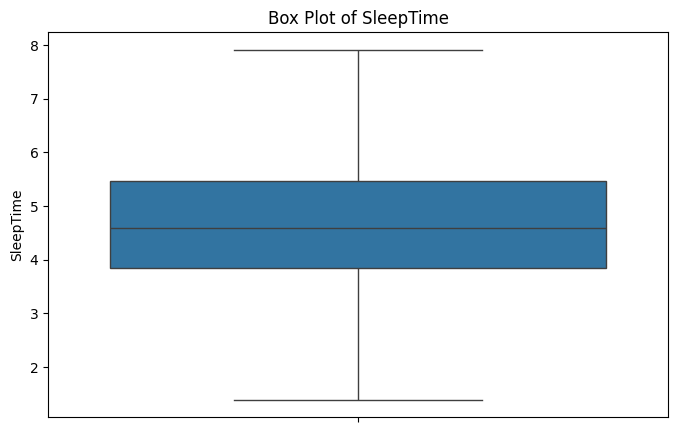

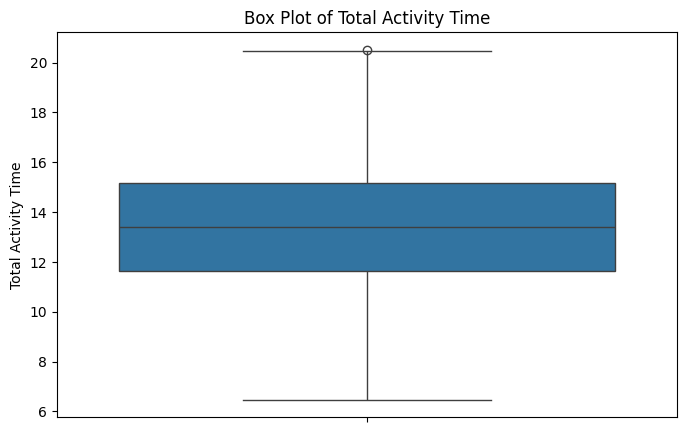

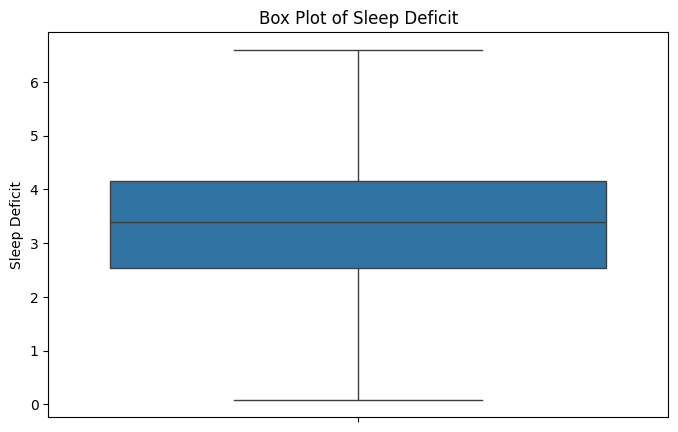

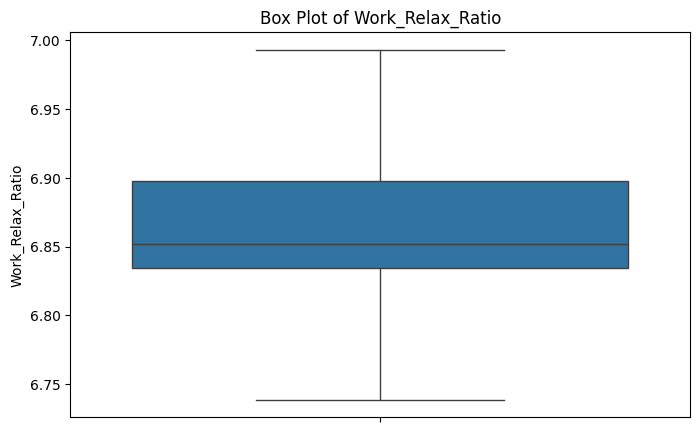

In [339]:
for col in df:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

### **3.3 Correlation of Data**

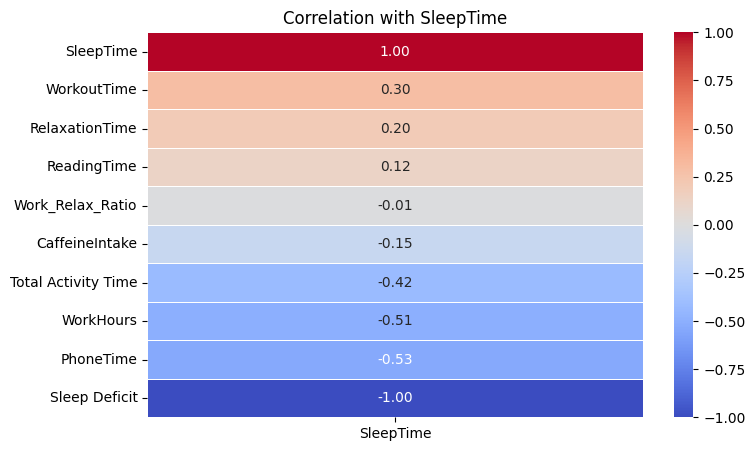

In [340]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['SleepTime'].sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with SleepTime')
plt.show()

### **3.4 Machine Learning**

In [341]:
threshold = 0.5

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["SleepTime"]) > threshold].tolist()
high_corr_features.remove("SleepTime")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["SleepTime"]

['PhoneTime', 'WorkHours', 'Sleep Deficit']


In [342]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.2 , random_state=42)

In [343]:
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [344]:
y_pred1 = model1.predict(X_test)

In [345]:
model2 = DecisionTreeRegressor()
model2.fit(X_train , y_train)

DecisionTreeRegressor()

In [346]:
y_pred2 = model2.predict(X_test)

In [347]:
model3 = RandomForestRegressor()
model3.fit(X_train , y_train)

RandomForestRegressor()

In [348]:
y_pred3 = model3.predict(X_test)

In [349]:
model4 = HistGradientBoostingRegressor()
model4.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [350]:
y_pred4 = model4.predict(X_test)

In [351]:
model5 = KNeighborsRegressor()
model5.fit(X_train , y_train)

KNeighborsRegressor()

In [352]:
y_pred5 = model5.predict(X_test)

In [353]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

for model in [model1, model2, model3, model4, model5]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

LinearRegression
MSE: 6.818716449504121e-31
R2 Score: 100.00%

DecisionTreeRegressor
MSE: 3.550000000000004e-05
R2 Score: 100.00%

RandomForestRegressor
MSE: 1.3112299999999939e-05
R2 Score: 100.00%

HistGradientBoostingRegressor
MSE: 0.0026191466113263473
R2 Score: 99.82%

KNeighborsRegressor
MSE: 0.0125228325
R2 Score: 99.14%



In [354]:
results = []
for model in [model1, model2, model3, model4, model5]:

    train_mse, train_r2 = evaluate_model(y_train, model.predict(X_train))
    test_mse, test_r2 = evaluate_model(y_test, model.predict(X_test))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Score %,Test Score %
0,LinearRegression,100.00,100.00
1,DecisionTreeRegressor,100.00,100.00
2,RandomForestRegressor,100.00,100.00
3,HistGradientBoostingRegressor,99.76,99.82
4,KNeighborsRegressor,99.38,99.14


In [355]:
model_Ridge = Ridge()
model_Ridge.fit(X_train , y_train)

Ridge()

In [356]:
for model in [model_Ridge]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

Ridge
MSE: 6.115122057107461e-07
R2 Score: 100.00%



# 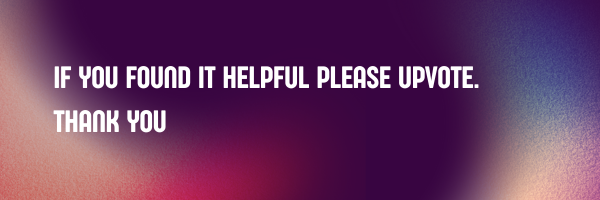